# A) K Means Clustering

**Imports** 

These are the libraries we will use in part A of the Notebook.

In [1]:
#imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# generating data 
from sklearn.datasets import make_blobs

#set random seed for reproduciblity
np.random.seed(42)

A 1) We will generate data clusters using `sklearn.datasets.make_blobs` in the cell below. We will generate four clusters with thier centres on the vertices of a unit square.

In [2]:
# generate data 

#centers of clusters
centers = [[1,0],
           [0,1],
           [1,1],
           [0,0]]

#std dev of clusters
std = 0.2

#generate data 
X, cluster_labels = make_blobs(n_samples=3000, 
                              centers=centers, 
                              cluster_std=std)



A 1.2) Let's take a look at the generated data by plotting a scatter plot in the cell below.

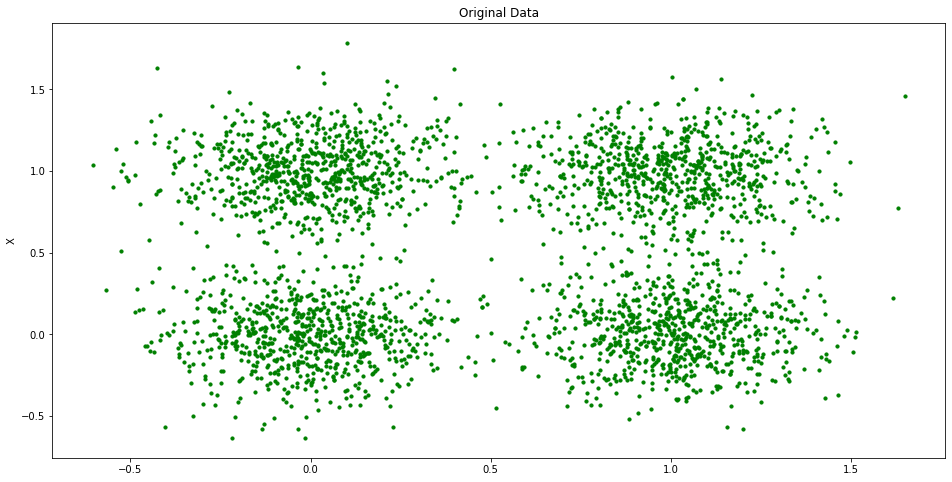

In [3]:

fig = plt.figure(figsize=(16,8))
plt.title('Original Data')
plt.ylabel('Y')
plt.ylabel('X')

plt.scatter(x=X[:,0],
            y=X[:,1],
            color = 'g',
            s=10)
plt.show()

A 1.3) Let's say we want to cluster this data, so that points that are close to each other, form a cluster.

The clustering results should look something like this plot. Note that we have generated the labels for this data called `cluster_labels` using the `make_blob` function.

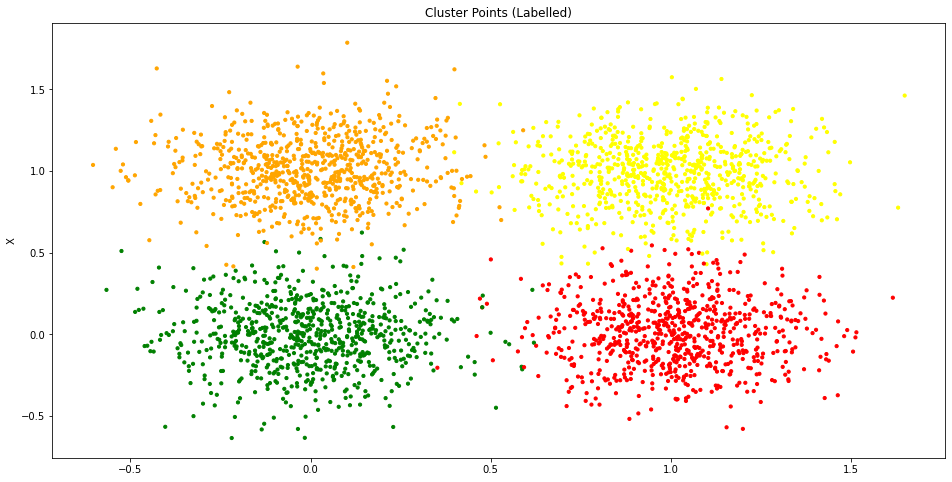

In [4]:
#map a color to each cluster 
cluster_colors = {0:'red',
                  1:'orange',
                  2: 'yellow',
                  3:'green',
                  4: 'purple',
                  5: 'blue',
                  6: 'maroon',
                  7: 'cyan'}

colrs = [cluster_colors[clustr] for clustr in cluster_labels] # assign a color to each of the cluster values 

fig = plt.figure(figsize=(16,8))
plt.title('Cluster Points (Labelled)')
plt.ylabel('Y')
plt.ylabel('X')

plt.scatter(x=X[:,0],y=X[:,1],color = colrs,s=10)
plt.show()

## **The Kmeans Algorithm**

    1) Randomly select k points, each of which is a cluster centroid, where k is the number of clusters.

    2) Assign each point to its closest centroid.

    3) Assign the value of cluster centroid to the mean of points assigned to that cluster.

    4) Repeat steps 2 and 3 until the values of cluster centroids converge (i.e values do not change significantly).


We have defined the helper functions that we will require in the next cell. Run this cell.

In [5]:
#helper functions
def random_init(points,k):
  # randomly initialize cluster centroids 
  index = np.random.randint(0,
                            len(points),
                            size=k)

  #select points 
  centroids =  points[index,:]

  return centroids 



def euclidian_distance(X1,
                       centroid):
  return np.sqrt(np.sum(np.square(X1 - centroid),axis=1))


def get_nearest(points,
                centroids):
  
  #store list of distances between each point and centroid for all the centroids
  centroid_distances = []

  for i,centroid in enumerate(centroids):

    #calc distances to each point from the each centroid
    distances = euclidian_distance(points,centroid)

    #store distances from each point for this centroid:
    centroid_distances.append(distances)

  # print(np.array(centroid_distances).T.shape)
  # assign each point to its closest centroid 
  clusters = np.array(centroid_distances).T.argmin(axis=1)


  return clusters


def update_centroid(cluster_points):
   # update the cluster centroid based on the points assigned

   centroid = np.mean(a=cluster_points,axis=0)

   return centroid 


### **Step 1 : select k random points as centroids**

We initialize centroids randomly with the function  `random_init` and then plot the randomly initialized centroids along with the data.

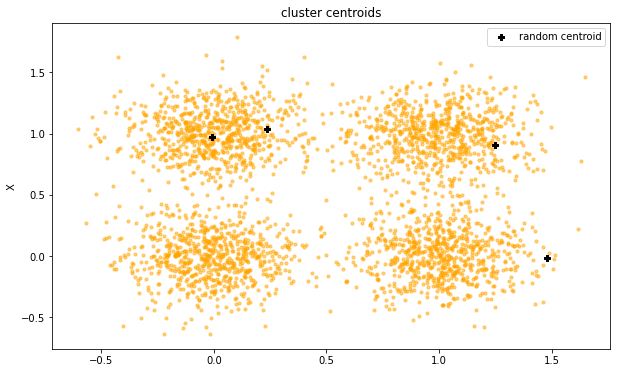

In [6]:

# lets select 4 points as centroids

#select a value of number of clusters
k =4

centroids = random_init(points = X, #data points
                        k = k)      # number of cluster centroids



# plot the clusters and original data
fig = plt.figure(figsize=(10,6))
plt.ylabel('Y')
plt.ylabel('X')
plt.scatter(X[:,0],X[:,1],color='orange',s=10,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],color = 'k',marker= 'P',label = 'random centroid')
plt.title('cluster centroids')
plt.legend()
plt.show()

### **Step 2: Assign each point in the dataset to the closest cluster center (referred to as `centroid`) to that point.** 

We assign each point to the nearest centroids defined earlier using the function `get_nearest`, which takes the arguments points (data points) and centroids (centroids we defined in previous cell).

In [7]:
#step 2 (assign each point to a cluster)
clusters = get_nearest(points=X,
                       centroids =centroids )

print(f'Unique values of clusters are {np.unique(clusters)}')

Unique values of clusters are [0 1 2 3]


### **Step 3 : Calculate the new centroid based on points assigned to each cluster.**


For all the points assigned in a cluster, we recalculate the cluster centroid by taking the mean of all points within that cluster. We use `update_centroid` function to calculate mean value of all the points assigned to the cluster. 

We repeat the above process for each cluster.

In [8]:

#step 3
#dictionary to store points assigned to each cluster
cluster_dict ={} 

# list to store new centroids
new_centroids = []

for cluster in np.unique(clusters):

  #find points assigned to each cluster using the index
  closest_points = X[np.where(clusters == cluster,True,False)]
  
  #store points assigned 
  cluster_dict[cluster] = closest_points

  # step3:  based on points assigned in step 2 , calculate new position of centroid 
  centroid = update_centroid(closest_points)

  #store the value of updated centroids
  new_centroids.append(centroid)


Lets see a plot of how our points and clusters look

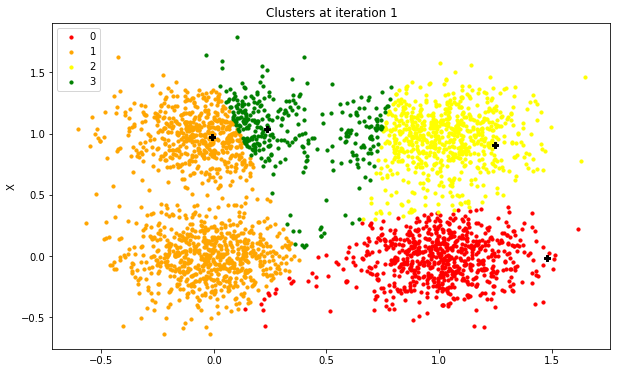

In [9]:
#plot assigned points
#plot progress
fig = plt.figure(figsize=(10,6))
plt.ylabel('Y')
plt.ylabel('X')
plt.title('Clusters at iteration 1')
#plot the cluster
for cluster,val in cluster_dict.items():
  plt.scatter(val[:,0],val[:,1],color=cluster_colors[cluster],label = cluster,s=10)
  plt.scatter(centroids[cluster][0],centroids[cluster][1],color = 'k',marker= 'P')


plt.legend()
plt.show()


Update the values of centroids. The new value of centroid for any cluster is the mean of all the points assigned to that cluster.

In [10]:
#update values of centroids 
centroids = np.array(new_centroids)

### **Step 4: Repeat steps 2,3.** Lets repeat steps 2,3 for a few iterations to see how the clutsers and centroid changes.

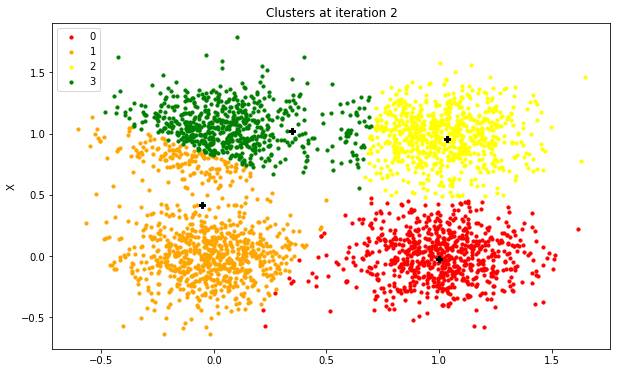

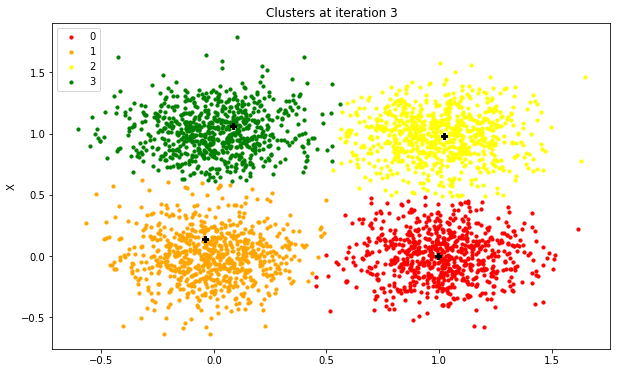

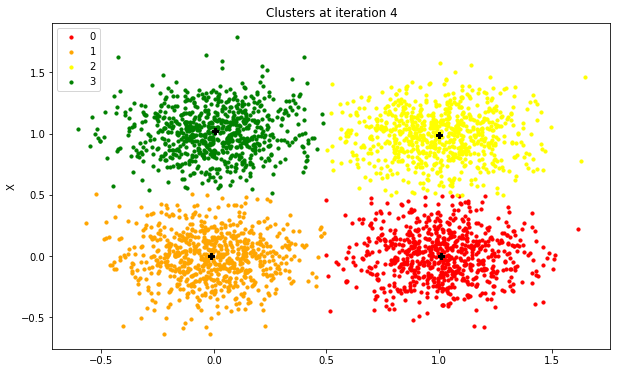

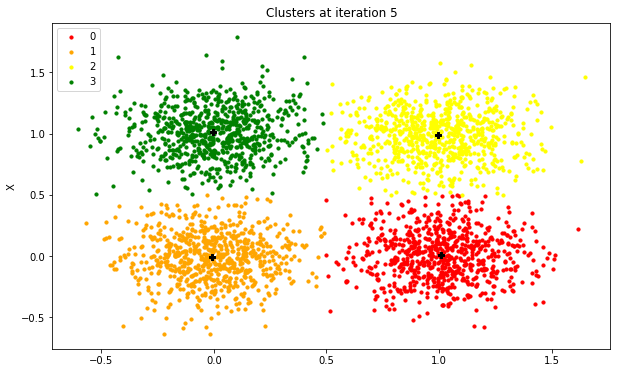

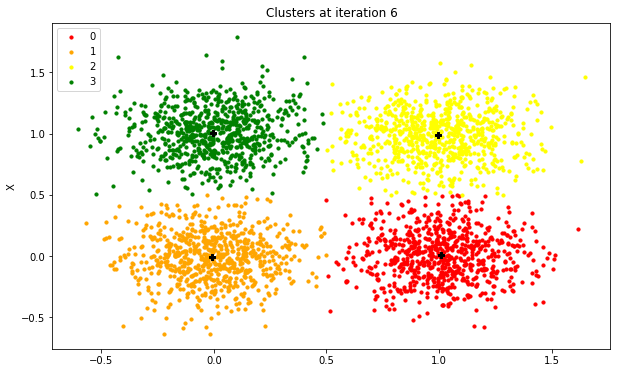

In [11]:

for iter in range(2,7):

  #step 2 (assign each point to a cluster)
  clusters = get_nearest(points=X,
                        centroids =centroids )


  #step 3
  #dictionary to store points assigned to each cluster
  cluster_dict ={} 

  # list to store new centroids
  new_centroids = []

  for cluster in np.unique(clusters):

    #find points assigned to each cluster using the index
    closest_points = X[np.where(clusters == cluster,True,False)]
    
    #store points assigned 
    cluster_dict[cluster] = closest_points

    # step3:  based on points assigned in step 2 , calculate new position of centroid 
    centroid = update_centroid(closest_points)

    #store the value of updated centroids
    new_centroids.append(centroid)

  # plot assigned points
  #plot progress
  fig = plt.figure(figsize=(10,6))
  plt.ylabel('Y')
  plt.ylabel('X')
  plt.title(f'Clusters at iteration {iter}')
  #plot the cluster
  for cluster,val in cluster_dict.items():
    plt.scatter(val[:,0],val[:,1],color=cluster_colors[cluster],label = cluster,s=10)
    plt.scatter(centroids[cluster][0],centroids[cluster][1],color = 'k',marker= 'P')


  plt.legend()
  plt.show()
    
    #update values of centroids 
  centroids = np.array(new_centroids)


### **Building a Function for "K Means" Algorithm**

Lets put all of the steps done above , and repeat steps 2,3 till the values of centroids converge(i.e do not change significantly) , and make a function out of it.

In [12]:
def Kmeans(points,      # points to cluster 
          num_clusters, # number of clusters 
          plot = True,  # for plotting progression
          ):

  #step 1 : init centroid points points
  centroids = random_init(points = X ,
                          k = num_clusters )

  iter = 0

  while True:
      

    #step 2 (assign each point to a cluster)
    clusters = get_nearest(points=X,
                          centroids = centroids )


    #step 3
    #dictionary to store points assigned to each cluster
    cluster_dict ={} 

    # list to store new centroids
    new_centroids = []

    for cluster in np.unique(clusters):

      #find points assigned to each cluster using the index
      closest_points = X[np.where(clusters == cluster,True,False)]
      
      #store points assigned 
      cluster_dict[cluster] = closest_points

      # step3:  based on points assigned in step 2 , calculate new position of centroid 
      centroid = update_centroid(closest_points)

      #store the value of updated centroids
      new_centroids.append(centroid)

    #store as array
    new_centroids = np.array(new_centroids)

    # repeat step 2,3 till there is no significant improvement in means
    if np.mean(abs(np.mean(centroids-new_centroids)))<0.0001:
      break

    centroids = new_centroids  # update value of centroids

    if plot:

      #plot progress
      fig = plt.figure(figsize=(10,6))
      plt.title(f'K Means Clustered points at iteration {iter+1}')
      plt.ylabel('Y')
      plt.ylabel('X')

      #plot the cluster
      for cluster,val in cluster_dict.items():
        plt.scatter(val[:,0],val[:,1],color=cluster_colors[cluster],label = cluster,s=10)
        plt.scatter(centroids[cluster][0],centroids[cluster][1],color = 'k',marker= 'P')


      plt.legend()
      plt.show()
    
    iter+=1


  return centroids,cluster_dict

    


Calling the function defined above, to cluster the dataset (X) into 4 clusters

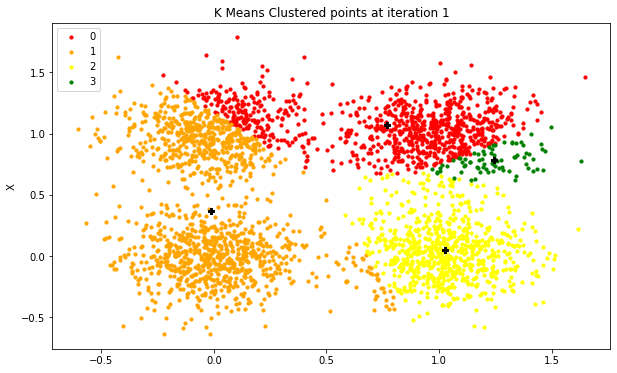

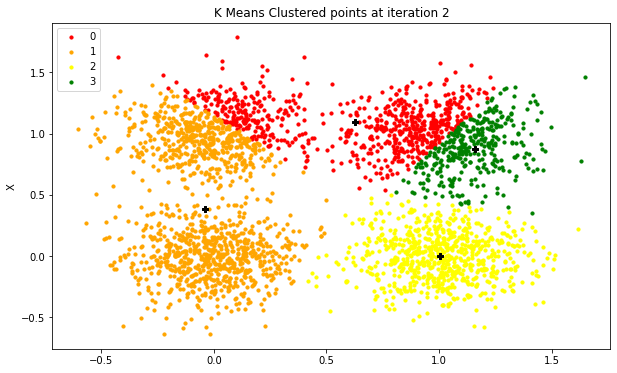

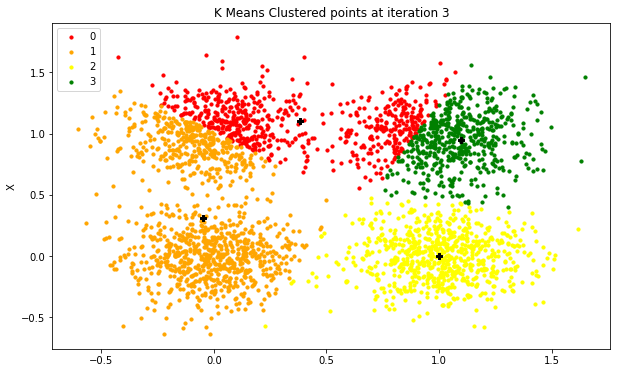

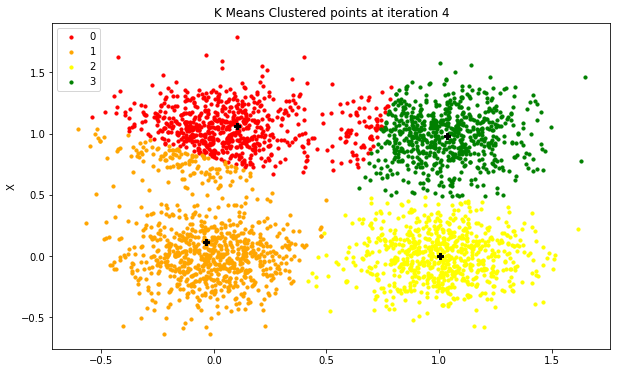

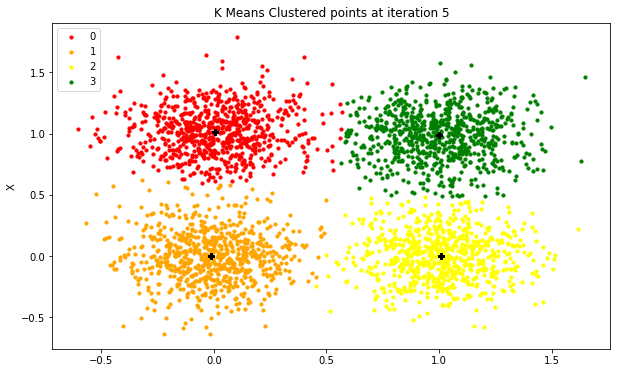

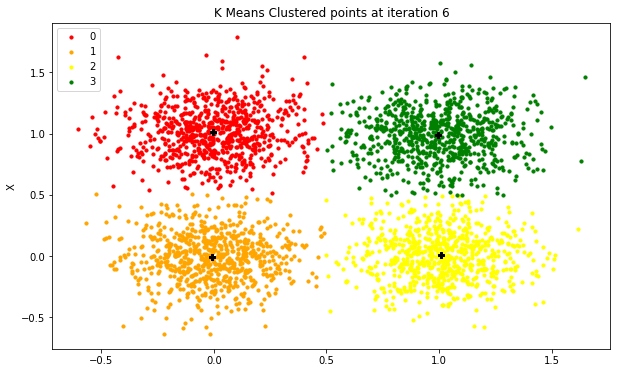

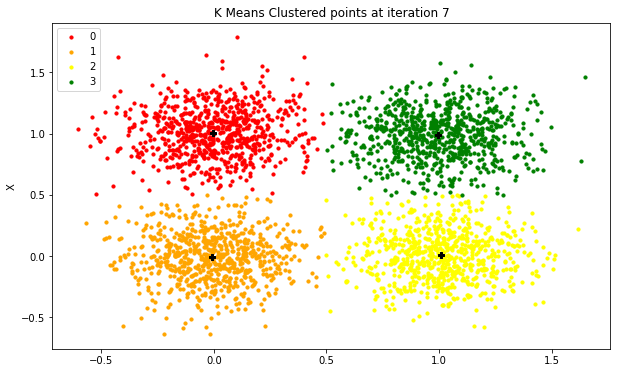

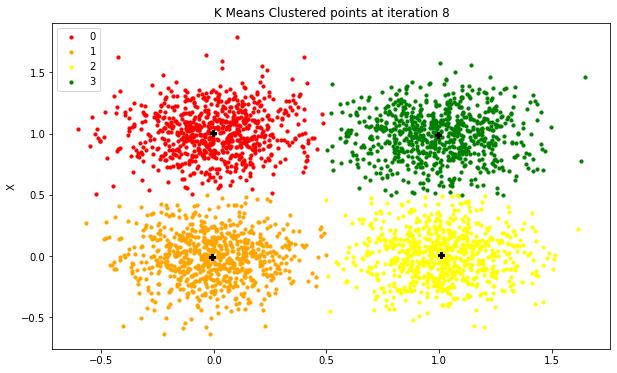

In [13]:
# cluster points based on algo defined above

centroids, cluster_points = Kmeans(points = X,
                           num_clusters = 4,
                           plot = True) # use plot = False to suppress plotting


### **Plotting results obtained from clustering using functions above.**

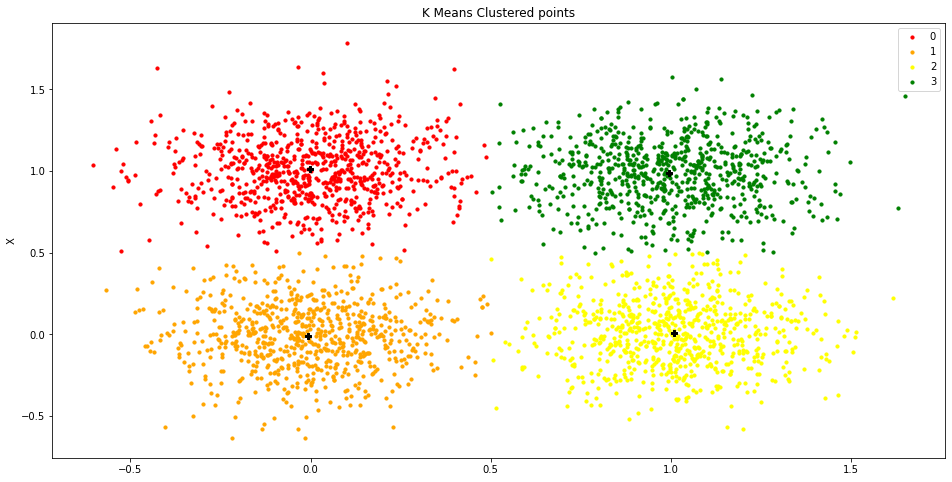

In [14]:

fig = plt.figure(figsize=(16,8))
plt.title('K Means Clustered points')
plt.ylabel('Y')
plt.ylabel('X')

#plot the cluster
for cluster,val in cluster_points.items():
  plt.scatter(val[:,0],val[:,1],color=cluster_colors[cluster],label = cluster,s=10)
  plt.scatter(centroids[cluster][0],centroids[cluster][1],color = 'k',marker= 'P')

plt.legend()
plt.show()

Try out different values of k , and see how the plot differs and where the centroids lie.

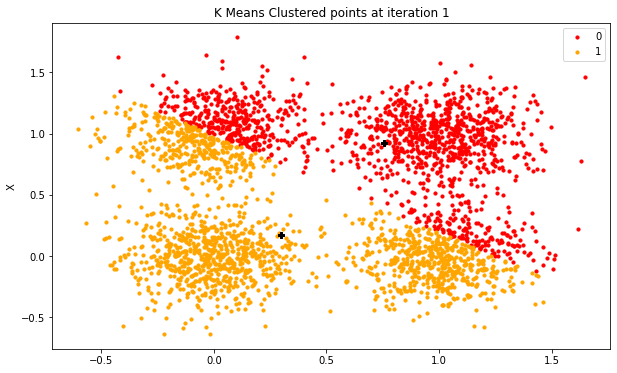

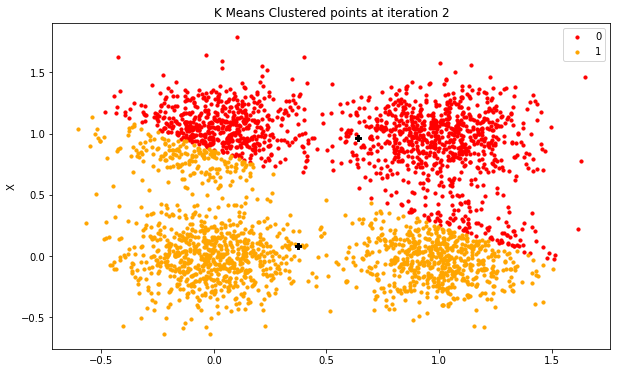

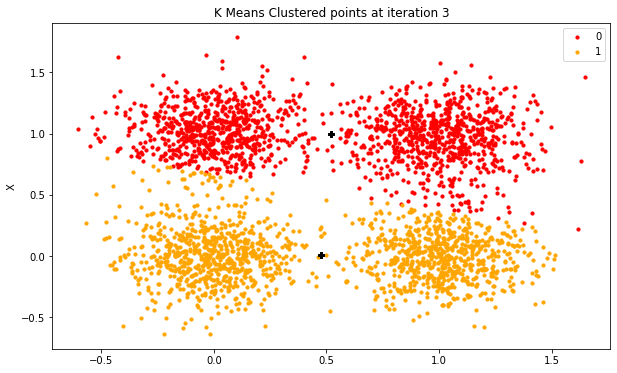

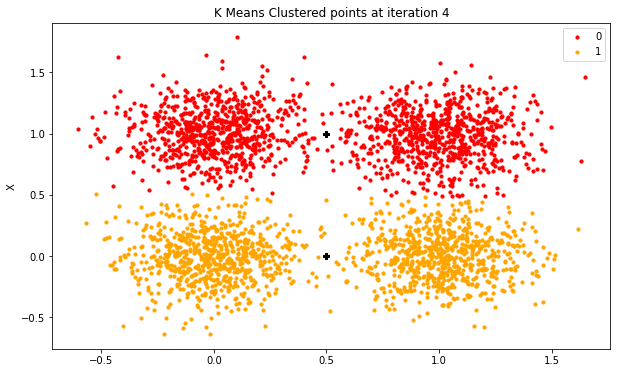

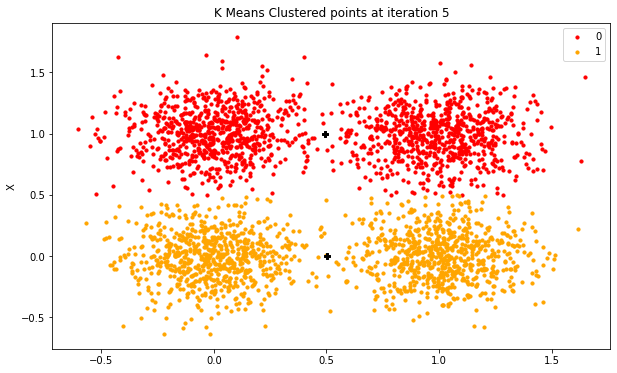

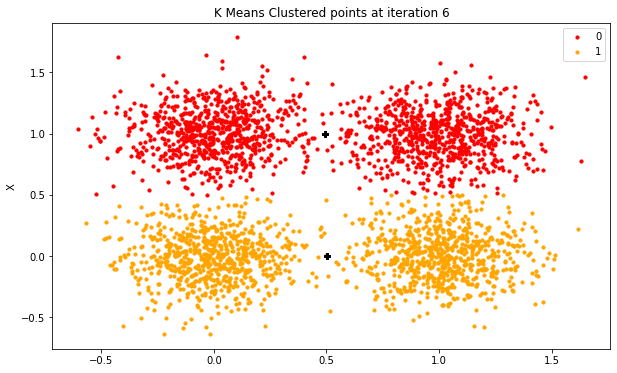

In [15]:
centroids, points = Kmeans(points = X,
                           num_clusters =2,  # use a maximum of 8 , as we have not defined more colors to represent clusters 
                           plot = True)

## **Breakout Room Exercise**

### **For this exercise, we will try to segment a simple Image into clusters using the K means algorithm.**

In [16]:
#imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans


Run the following cell to download the Image.

In [17]:
!wget -O sky.jpeg https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/images/UnsupervisedLearning/sky.jpeg

zsh:1: command not found: wget


**Run the next cell to load and take a look at the image**

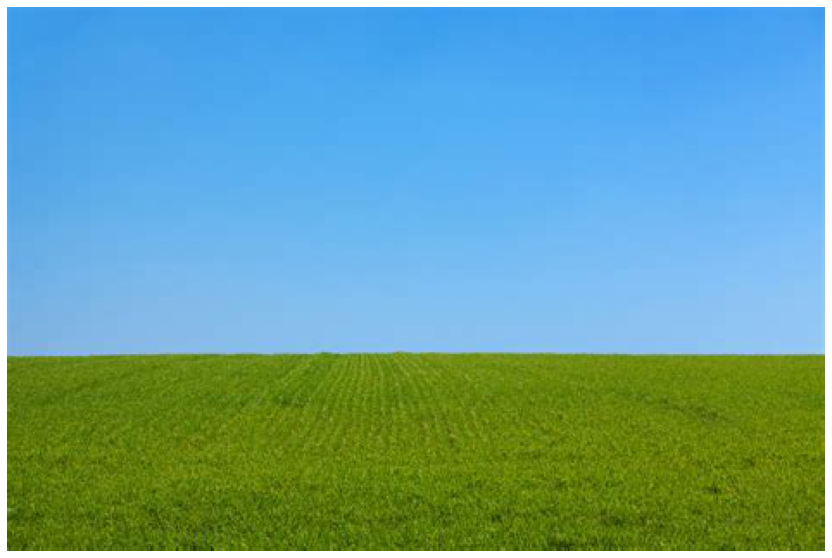

In [ ]:
#load the image , rescale by 255.

image = plt.imread('sky.jpeg') / 255.0

#plotting the image
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(image)
plt.show()

In [ ]:
# check the shape of the image 
image.shape

(315, 474, 3)

**Next we store image height and width**

In [ ]:
h,w = image.shape[0],image.shape[1]

print(f' Height of Image is {h} \n Width of Image is {w}')

 Height of Image is 315 
 Width of Image is 474


**In the next cell, we will reshape the image, so to have dimensions (n,3) where n is number of Image Pixels(i.e Image Height * Image Width)**

In [ ]:
X1 = image.reshape((-1,3))

#check the shape of X 

X1.shape

(149310, 3)

### **Your Work**

* A 2.1) : Check the shape of X .
* A 2.2) : Based on the Image plotted above, decide the number of clusters you want to have (i.e the value of k).
* A 2.3) Use `sklearn.cluster.KMeans` to find clusters in the data. First create an instance of KMeans in a variable called `kmeans`. Then fit the data by calling `kmeans.fit(X)`.
* A 2.4) Predict clusters by using `kmeans.predict(X)`.
* A 2.5) Print the value of cluster_centers by using `kmeans.cluster_centers_`.
* A 2.6) Assign the value of cluster centroid as the color for each cluster.This step is done for you.
* A 2.7) Reshape the data, so that it has the dimesions of our original Image.Plot the result.

#### **A 2.1) : Check the shape of X.**



In [ ]:
#check the shape of X
X1.___

#### **A 2.2) : Based on the Image plotted above, decide the number of clusters you want to have(i.e the value of k).**

In [ ]:
#based on the image above, decide the number of cluster you want to have (experiment with different values of k)


k = ___ # fill the value of k 

#### **A 2.3) Use `KMeans` to find clusters in the data. First create an instance of KMeans in a variable called `kmeans`. Then fit the data by calling `kmeans.fit(X1)`.**

In [ ]:

kmeans = KMeans(n_clusters = k)

# fit the data on 'X' by using 'kmeans.fit(X)'
___ #code here


#### **A 2.4) Predict clusters by using `kmeans.predict(X)`**

In [ ]:
x_clusters = ___ # predict

#### **A 2.5) Print the value of cluster_centers by using `kmeans.cluster_centers_`.**

In [ ]:
#get the cluster centroids using `kmeans.cluster_centers_`

centroids = kmeans.___ # code here 

#print value of cluster centroids
centroids

**In the next cell, check the shape of `x_clusters`, i.e the labels obtained after clustering X.**

In [ ]:
#check shape
x_clusters.___

#### **A 2.6) Assign the value of cluster centroid as the color for each cluster.This step is done for you.**

Run the next two cells to assign the colors we have defined to each of the clustered pixel. Here we assign each cluster to the value of its centroid.

Run the next cell to assign a color value (RGB) to each unique cluster. This will give you a dictionary where each cluster will be mapped with its centroid's color (RGB value).

In [ ]:
# we are mapping each cluster to the color of the its centroid
cluster_color = {i:centroid for i,centroid in enumerate(centroids)}

# print each color assigned to the cluster
for cls , color in cluster_color.items():
  print(f'cluster {cls} has color  {color}')

Run the next cell to replace the value of each pixel in each cluster by the color assigned to that cluster.


In [ ]:

clusters_df = pd.DataFrame(x_clusters,
                           columns=['cluster_labels'])

# map each cluster to color of its centroid 
clusters_df['cluster_color'] = clusters_df['cluster_labels'].map(cluster_color)

# now we have a unique color for each of the cluster
x_clusters_colored = clusters_df['cluster_color'].values.tolist()
x_clusters_colored = np.array(x_clusters_colored)

We should have a color representing every point(pixel) in `x_clusters_colored` now. Check the shape in the cell below.

In [ ]:
#check the shape of `x_clusters_colored`
x_clusters_colored.___

#### **A 2.7) Reshape the data, so that it has the dimesions of our original Image.**

Reshape `x_clusters_colored` to shape "(h,w,3)". 
Take the reshape function we have used above as reference. 

Note that h,w are variables that store the values of height,width of our original image respectively.

In [ ]:
#reshape x_cluster to shape : (h,w,3)

# code here 
shape = (h,w,3)
x_cluster_image = x_clusters_colored.___

#check the shape of `x_cluster_image`
x_cluster_image.shape

**Phew! Thats a lot of work. Now we can plot the Image , and see what results we have from clustering. Run the next cell to plot the results.**

In [ ]:

#plotting the image
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(x_cluster_image)
plt.title('Image Segmented with KMeans')
plt.show()

**Compare the results visually by plotting the original image in the next cell.**

In [ ]:

#plotting the image
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(image)
# plt.imshow(x_cluster_image,alpha =0.25)
plt.title('Comparison with original image')
plt.show()

**If you made it here, try changing the number of clusters (i.e k ) and see how it affects your segmented image. Try values of k like 3,5,7,10. You will be amazed with the power of a simple algorithm!**



---



---





# B) Principal Component Analysis (PCA)

**We will perform "Latent Semantic Analysis" using PCA in this notebook.**

Documents, Articles etc. can be represented by "bag of words", which is the count of how many times does a word appear in a document. These datasets have high dimensionality and sparsity, and we cannot visualize the dataset easily. We will use a "bag of words" dataset, and perform PCA on this dataset to see the representation in a lower dimension.

In [ ]:
#Imports 

import os 
import pandas as pd 

#plotting
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
#pca 
from sklearn.decomposition import PCA 



**About the dataset :** 

The dataset contains some news stories taken from the New York Times Annotated
Corpus (Sandhaus, 2008), which have been hand-annotated by actual human beings with standardized machine-readable information about their contents.

The dataset is a bag-of-words data frame consisting of randomly selected 57 stories about "art" and "45" stories about music.

Each row in the dataset is a story, while each column is a word. There is an additional column named "class.labels" which indicates if that row is a "music" or "art" category.
 

### B 1.1)  Loading Data from `dataset_url` defined below.

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/UnsupervisedLearning/nyt.csv'

df = pd.read_csv(dataset_url,
                 index_col=0)

df.head()

,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,abc,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,0.0,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#what is the shape of the data set 
df.shape

(102, 4432)

**We have 102 rows (stories) and 4432 columns (4431 words, 1 label).**

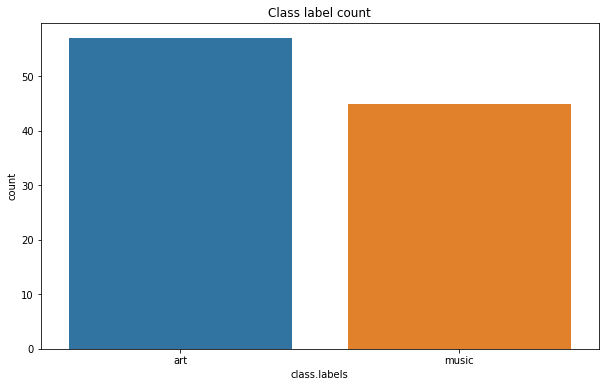

In [ ]:
#check the label count of the articles

fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='class.labels',data=df,ax=ax)
plt.title('Class label count')

plt.show()

### B 1.2) Seperate Stories and Labels 

In [ ]:
#seperate X and y 
X = df.drop('class.labels',axis=1)

y = df['class.labels'].values

**Getting Principal Components**

### B 1.3) It is important to scale the variables, so that all the variables are on a common scale.

This data set has already scaled values so we are not scaling here. Following is the demo code to use standard scaler (not required here)


Here is the sample code to use standard scaler
```python
scaler = StandardScaler()

columns = X.columns
X = pd.DataFrame(scaler.fit_transform(X),
                  columns = columns)
```

### B 1.4) We will fit and transform the data to obtain principal components using sklearn.decomposition.PCA (already imported as PCA).

In [ ]:
#initiate pca with 2 components
pca = PCA(n_components=2)

#fit pca on X 
pca.fit(X)

#get principal components
x_pca = pca.transform(X)

#convert x_pca into a dataframe 

pca_df = pd.DataFrame(x_pca,
                      columns = ['PC1','PC2'])

pca_df.head()

,PC1,PC2
0,0.230162,-0.180800
1,-0.036320,-0.093901
2,0.093053,-0.132397
3,0.055416,-0.184318
4,0.137222,-0.035578


### B 1.5) Get the eigenvectors for the transformation.

In [ ]:
#use pca .components to get eigenvec
components = pca.components_

components_df = pd.DataFrame(components,
                             index = ['PC1','PC2'],
                             columns = X.columns)

components_df.head()

,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,abc,ability,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
PC1,-0.026362,-0.040449,0.006932,0.021299,-0.035491,0.004922,0.012545,-0.003539,-0.001416,0.015582,...,-0.005812,-0.003052,0.051163,0.029035,-0.002162,0.012320,0.005358,-0.000680,0.007251,-0.005299
PC2,0.002407,-0.003875,-0.004687,-0.033797,-0.015672,-0.012947,-0.004897,-0.008640,0.009088,0.001485,...,0.008220,0.001560,0.041480,0.007055,-0.008770,0.017239,0.018517,0.005653,-0.006759,-0.006625


### B 1.6) Let's check if the principal components are orthogonal (i.e perpendicular) to each other.

Remember that two vectors are perpendicular if their dot product is zero.

In [ ]:

print('The dot product of PC1 and PC2 is {}'.format(round(abs(np.dot(pca_df['PC1'].values,pca_df['PC2'].values)),2)))

The dot product of PC1 and PC2 is 0.0


### B 1.7) Lets join the labels to `pca_df` for visualizing the categories differently.

In [ ]:
pca_df['article_type'] = y  # join y to pca_df


pca_df.head()

,PC1,PC2,article_type
0,0.230162,-0.180800,art
1,-0.036320,-0.093901,art
2,0.093053,-0.132397,art
3,0.055416,-0.184318,art
4,0.137222,-0.035578,art


### B 1.8) Plotting Principal Components

In [ ]:

#marker dict to map 
marker_dict = {'art':'o',
               'music':'v'}


#assign a color to labels
color_dict={'art':'r',
            'music':'g'}

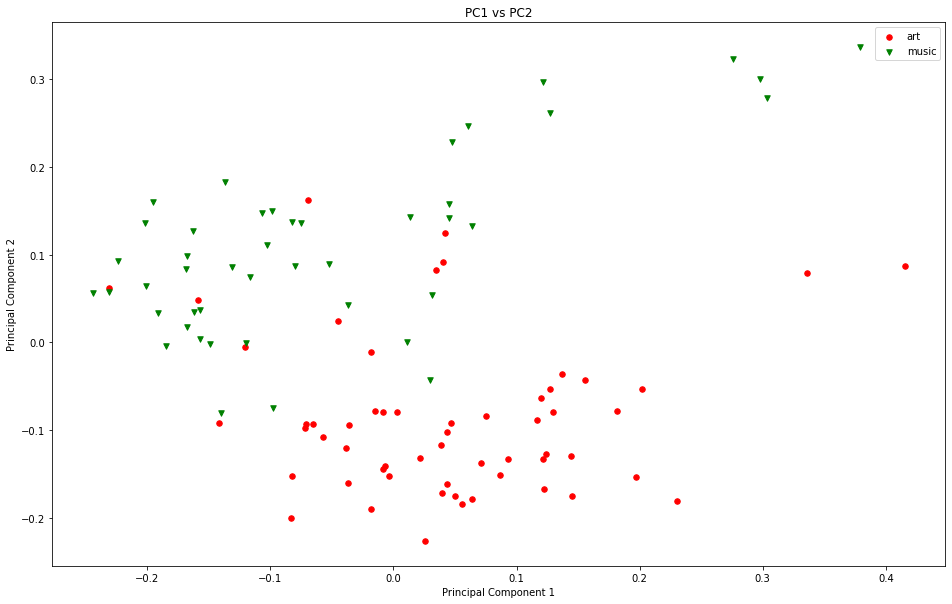

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))


for label in ['art','music']:

  #select article of type 
  df2 = pca_df[pca_df['article_type']==label]
  plt.scatter(x =df2['PC1'],
              y = df2['PC2'],
              c = color_dict[label],
              marker = marker_dict[label],
              label = label,
              s=30)


plt.title('PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Exercise: Understanding Principal Components

**Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#scaling 
from sklearn.preprocessing import StandardScaler

#pca
from sklearn.decomposition import PCA

**B 2.1) Generating a simple dataset.**

We will generate a simple dataset for understanding PCA. Run the next cell to generate the dataset.

In [ ]:
def func_x(x,
           x_multiplier = 0.25,
           noise_multiplier= 2,
           bias = 1.5):
  '''An simple function to get y as a func of x'''

  noise = np.random.randn(len(x)) 

  y = x*x_multiplier + (noise *noise_multiplier) + bias

  return y 

#generate equally spaced 2000 points from -50 to 150
x1 = np.linspace(start=-50,stop=150,num=2000)

#generate x2
x2 = func_x(x1,noise_multiplier= 10)



df_ex2 = pd.DataFrame({'x1':x1,
                       'x2':x2})

**B 2.2) Plotting generated data.**

Plot a scatterplot for the generated x1 (x-axis) and x2 (y-axis).

In [ ]:
fig=plt.figure(figsize=(12,7))
 

#plot x1 on x axis, x2 on y axis
#your code here

#set x and y labels

plt.title('Scatter plot of the generated data')
plt.show()

**Performing PCA**

* Standardize the data using StandardScaler.
* Use PCA from sklearn.decomposition to calculate 2 principal component.
* check that the principal components are orthogonal.
* plot pc1 vs pc2

B 2.3)First lets check the variance and mean of the generated data.

In [ ]:
# print the mean and variance of x1,x2 by running the cell below


#calculate the mean and variance of x1
mean_x1 = --
var_x1  = --

#calculate the mean and variance of x2
mean_x2= --
var_x2 = --


#run to print the results.
print(f"Mean of x1 is {mean_x1} and variance is {var_x1}")
print('-'*20 + '*'*10 + '-'*20)
print(f"Mean of x2 is {mean_x2} and variance is {var_x2}")

Lets check the covariance of the dataset. use `df_ex2.cov()` to calculate the covariance.

In [ ]:
#code here (calculate the covariance matrix)
cov_mat = --

#check the covariance heatmap by running this cell 
fig=plt.figure(figsize=(7,7))
sns.heatmap(cov_mat)
plt.title('Correlation Heatmap')
plt.show()

**B 2.4) Scale the data using Standard Scaler**

Use StandardScaler to scale the variables, so that they are on a common scale. 

In [ ]:
#your code here

#scale the dataset using standard scaler.
scaler = 

#set the scaled dataset to X_scaled
X_scaled = 


#get the scaled values of x1,x2
x1_sc,x2_sc = X_scaled[:,0],X_scaled[:,1] 

run the next cell to plot a scatter plot of scaled data

In [ ]:
#plot a scatter plot of the scaled data 

fig=plt.figure(figsize=(12,7))

#plot x1 on x axis, x2 on y axis
plt.scatter(x1_sc,x2_sc,s=10)

#set x and y labels
plt.xlabel('x1 scaled')
plt.ylabel('x2 scaled')

plt.title('Scatter plot of the scaled data')
plt.show()

**The first principal component finds the direction in the data that maximizes the variance in the data. Can you try to guess along which direction will there be maximum variance?**


In [ ]:

print(f"Mean of x1 after scaling is {round(X_scaled[:,0].mean(),2)} and variance is {round(X_scaled[:,0].var(),2)}")
print('-'*20 + '*'*10 + '-'*20)
print(f"Mean of x2 after scaling is {round(X_scaled[:,1].mean(),2)} and variance is {round(X_scaled[:,1].var(),2)}")
#print the mean and variance of the scaled values by running the following cell

**2.5) Calculate the principal component by using argument `n_components = 2` while creating a instance of PCA.**

In [ ]:
#perform PCA.

#your code here
pca = ___

# fit pca with X_scaled  `pca.fit(X_scaled)``


#obtain the principal components by using `pca.transform(X_scaled)``
pc = ___


#check the shape of pc 
pc.shape

In [ ]:
#getting individual values of pc1 and pc2
pc1,pc2 = pc[:,0] , pc[:,1]

B 2.5) Lets check if the two pcs we obtained are orthogonal(i.e perpendicular). 

  One way you can do that is by checking the dot product of x1 & x2 .

  If two vectors are orthogonal, their dot product is 0.

In [ ]:
#your code here

#get the dot product of pc1 and pc2 (by using np.dot(pc1,pc2) )
dt_prd = ___

print(f'The dot product of pc1 and pc2 is {dt_prd.round(4)}')

In [ ]:
#the dot product we used above is simply doing this calculation 
dt_prd2 = sum(pc1 * pc2) 
print(f'The dot product of pc1 and pc2 is {dt_prd2.round(4)}')

B 2.6) How much of the variance in original data is explained by each of the pc?

In [ ]:
#get explained variance by using `pca.explained_variance_ratio_`

#your code here
explained_ratio = ___


#print explained ratio by each col
for pc,var in zip(['pc1','pc2'],explained_ratio):
  print(f'variance explained by {pc} is {var*100} %')

In [ ]:

#run to see plot of variance explained by each pc
plt.figure(figsize=(7,4))
plt.bar(x=['PC1','PC2'],height=explained_ratio *100)
plt.ylabel('% of variance explained ')
plt.xlabel('Principal component')
plt.show()

In [ ]:
#the total % of variance explained by all the pcs can be obtained by summing the ratios
print(f'Total explained variance is {explained_ratio.sum().round(4) * 100} %')

B 2.7) get the components(eigenvectors) of pca using `pca.components_`. The components are the principal axes,representing the directions of maximum variance in the data.


In [ ]:
# use pca.components_ to get components

#your code here
components = ___



**What are these components?**

we multiply the ith row of components above with the original dataset to get i'th pc.

i.e let components[0,0], components[0,1] = c11,c12  . then 

**pc1 = x1 * c11 + x2 * c12** 

i.e each element "p_i" of pc1 is equal to (x1_i * c11 + x2_i * c12).   

similarly let components[1,0], components[1,1] = c21,c22  . then: 

**pc2 = x1 * c21 + x2 * c22**

Lets check the formula given above out.

In [ ]:
#get the scaled values of x1,x2
x1_sc,x2_sc = X_scaled[:,0],X_scaled[:,1] 

#get first row elem of components
c11,c12= components[0,0],components[0,1] 

pc1 is a linear combination of x1 and x2. 

i.e pc1 = x1 * c1 + x2 * c2 , 

where c1,c2 are some constants,which represent direction of maximum variance.

In [ ]:
# calculate pc1 from x1,x2 and components
check_pc1 = c11* x1_sc + c12 * x2_sc 

#we can check if the two pc1's are the same by using the code below 

# np.allclose: Returns True if two arrays are element-wise equal within a tolerance
if np.allclose(check_pc1,pc1):
  print('pc1 and check_pc1 are the same')

END